<h3 style="color:#C0C0C0;text-align:center;font-size: smaller;">Applied Machine Learning and Data Mining - U26538</h3>

<br>
<h1 style="color:#800080;text-align:center;"> Practical Worksheet (18)</h1>
<h2 style="color:#800080;text-align:center;">DBSCAN Clustering</h2>

<h3 b> Introduction </h3>

In the following practical worksheet, you will learn how to use DBSCAN clustering algorithm. If you have any questions please ask for assistance during the session and you can also email me if you have any further questions <u> alaa.mohasseb@port.ac.uk</u>. 

<h1><b>Practical Example 1</b></h1>

<u>Dataset</u>

Mall Customers dataset will be used for the prediction of different customers using k-Mean Clustering. The Dataset contains five attributes and 200 instances. The attributes are Customer ID, Gender (male/female), the Age which is between 19 to 70 of different customers, Annual Income and Spending Score.  (Download the dataset from your moodle page).

The <i>objective of the clustering</i> is to create a group of clusters and label them based on the customers' spending habits the Annual Income and Spending Score will be used as features as they are the best factors to determine the segments of a customer.

<u>Import the Libraries</u>

In a new Jupyter Notebook (practWeek18ex1), load the NumPy, pandas and matplotlib libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
#this will make your plot outputs appear and be stored within the notebook

<u>Read External Data</u> (Mall dataset)
<ul>
<li>Download the dataset from your moodle page.</li>
<li>Upload the dataset to your Jupyter dashboard.</li>
<li>To read an external data (csv file) use the following command:</li>
</ul>

In [5]:
dataset=pd.read_csv('mallcustomers.csv')
X=dataset.iloc[:, [3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [ ]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<u>Data understanding and Exploration</u>

To understand the dataset, analysis should be done and some information needs to be explored such as:

- The Attributes
- Data Shape
- Data Description
- Data Information
- Data Type

In [ ]:
dataset.keys() #Print the attributes

Index([u'CustomerID', u'Genre', u'Age', u'Annual Income (k$)',
       u'Spending Score (1-100)'],
      dtype='object')

In [ ]:
dataset.describe() #Data description

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
dataset.dtypes #Data Type

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

<u>Build the Machine learning Model</u>

<b>DBSACN Clustering</b>

Apply DBSCAN Clustering to dataset and Visualising the Clusters.

In [ ]:
# import the DBSCAN cluster and scaler from scikit learn 
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [ ]:
# Scale the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<u>DBSCAN</u>

<code>eps: float, default=0.5</code>: The maximum distance between two samples for one to be considered as in the neighborhood of the other. 

<i>Note:</i> This is not a maximum bound on the distances of points within a cluster. This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.

<code>min_samples: int, default=5</code>: The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself.

<code>metric: str, or callable, default=’euclidean’</code>: The metric to use when calculating distance between instances in a feature array

In [ ]:
# Apply dbscan cluster
dbscan = DBSCAN(eps=0.5, min_samples = 5, metric='euclidean')

In [ ]:
# fit the model for prediction
clusters = dbscan.fit_predict(X_scaled)

In [ ]:
# The labels_ property contains the list of clusters and their respective points
clusters = dbscan.labels_

<u>Assign the clusters group</li>

In [ ]:
from pandas import Series, DataFrame
dataset['cluster group'] = Series(clusters, index=dataset.index)
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
5,6,Female,22,17,76,0
6,7,Female,35,18,6,0
7,8,Female,23,18,94,0
8,9,Male,64,19,3,0
9,10,Female,30,19,72,0


In [ ]:
# print number of instances in each cluster group
dataset['cluster group'].value_counts()

 0    157
 1     35
-1      8
Name: cluster group, dtype: int64

<u>Visualize the Clusters</u>

In [ ]:
#  map every individual cluster to a color for visualization
colors = ['royalblue', 'maroon','yellow']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

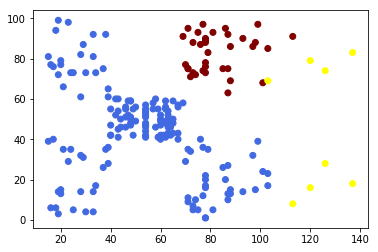

In [ ]:
# all the yellow points were categorized as noise
plt.scatter(X[:,0], X[:,1], c=vectorizer(clusters))

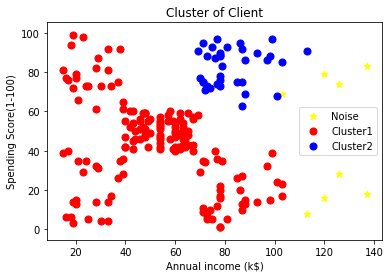

In [ ]:
# another way to visualize the Cluster groups
plt.scatter(X[clusters == -1, 0], X[clusters == -1, 1], s=50, c='yellow', marker='*', label = 'Noise')
plt.scatter(X[clusters == 0, 0], X[clusters == 0, 1], s=50, c='red', label = 'Cluster1')
plt.scatter(X[clusters == 1, 0], X[clusters == 1, 1], s=50, c='blue', label = 'Cluster2')
plt.title('Cluster of Client')
plt.xlabel('Annual income (k$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

<h1><b>Practical Example 2</b></h1>

<u>Dataset</u>

The iris data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. The predicted attribute: class of iris plant. 

<u>Import the Libraries</u>

In a new Jupyter Notebook (practWeek18ex2), load the NumPy, pandas and matplotlib libraries:

In [ ]:
# import the Libraries
import numpy as np        # used for multidimensional array
import pandas as pd       # used for import the dataset
import matplotlib.pyplot as plt   # used for plotting the Graph
from sklearn.datasets import load_iris #load dataset
from sklearn.preprocessing import StandardScaler #feature scaling 
%matplotlib inline

<u>Read the dataset</u>

In [ ]:
X, labels_true = load_iris(return_X_y=True)

<u>Applying DBSCAN to the iris dataset </u>

In [ ]:
# import the DBSCAN cluster and scaler from scikit learn 
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [ ]:
# Scale the dataset
X_scaled = StandardScaler().fit_transform(X)

In [ ]:
# Apply dbscan cluster
dbscan = DBSCAN(eps=0.5, min_samples = 10, metric='euclidean')

In [ ]:
# fit the model for prediction
clusters = dbscan.fit_predict(X_scaled)

In [ ]:
# The labels_ property contains the list of clusters and their respective points
clusters = dbscan.labels_

<u>Visualize the Clusters</u>

In [ ]:
#  map every individual cluster to a color for visualization
colors = ['red', 'yellow', 'forestgreen','black']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

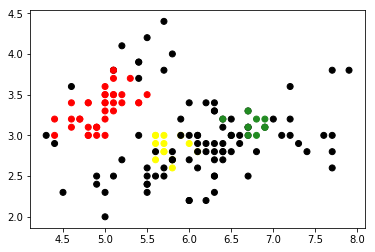

In [ ]:
# all the black points were categorized as noise
plt.scatter(X[:,0], X[:,1], c=vectorizer(clusters))

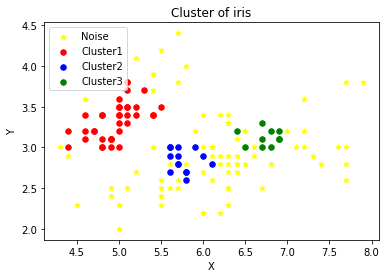

In [ ]:
# another way to visualize the Cluster groups
plt.scatter(X[clusters == -1, 0], X[clusters == -1, 1], s=30, c='yellow', marker='*', label = 'Noise')
plt.scatter(X[clusters == 0, 0], X[clusters == 0, 1], s=30, c='red', label = 'Cluster1')
plt.scatter(X[clusters == 1, 0], X[clusters == 1, 1], s=30, c='blue', label = 'Cluster2')
plt.scatter(X[clusters == 2, 0], X[clusters == 2, 1], s=30, c='green', label = 'Cluster3')
plt.title('Cluster of iris')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

<u>Cluster Evaluation (if dataset is labelled)</u>

In [ ]:
# Number of clusters in labels, ignoring noise if present.
import sklearn.metrics as metrics
n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise_ = list(clusters).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, clusters))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, clusters))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, clusters))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, clusters))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, clusters))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, clusters))

Estimated number of clusters: 3
Estimated number of noise points: 89
Homogeneity: 0.456
Completeness: 0.474
V-measure: 0.465
Adjusted Rand Index: 0.279
Adjusted Mutual Information: 0.446
Silhouette Coefficient: 0.007


<u>Method for determining the optimal eps value</u>

This method calculates the k-nearest neighbor distances in a matrix of points.
The idea is to calculate the average of the distances of every point to its k nearest neighbors. The value of k should be specified and corresponds to MinPts.
Next, these k-distances are plotted in an ascending order and the sorted distances produce a k-distance elbow plot.


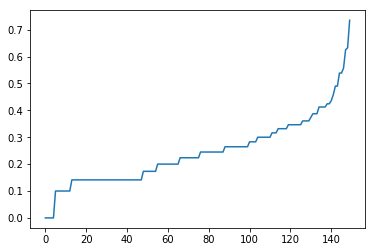

In [ ]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
#Calculate the average distance between each point in the dataset and its 4 nearest neighbors (MinPts value).
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)
#Sort distance values by ascending value and plot
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)